## Eigenvectors of the Covariance Matrix

### Introduction

In the lecture we discussed eigenvectors of the covariance matrix. The point of finding eigenvectors is that we can decompose a multivariate distribution, which may be quite complex, into a product of independent univariate Gaussian distrbutions  which we know how to handle. The process amounts to a basis transformation in data space. With respect to the new basis vectors the data is uncorrelated, and because the distribution is Gaussian, also *independent*. (This is not generally true, but it is true for Gaussian distributions: uncorrelated implies independent and vice versa).

In this notebook we will first use the spectral decomposition to create a  covariance matrix that we *know* will show preferred directions in the data because we construct it that way. We will then demonstrate with knowledge of the covariance matrix and the mean, you can *decorrelate* (or whiten) the data. Decorrelation of the data is often necessary if there are large differences in scale in the data before you start to apply other machine learning algorithms such as clustering. 


Often data shows a hierarchy in the eigenspectrum: a few large eigenvalues dominate. A technical expression for such an observation can be of the form: 'the first 5 eigenvalues explain 95% of the variance of the data.' Leaving
all but the first five eigenvectors substantially compresses the data while retaining most of its variation. This is the idea behind *Principal Component Analysis*.

### Leaning Objectives

The learning objectives for this notebook are:
- To demonstrate python code for sampling from multivariate Gaussian distributions.
- To demonstrate visually that the eigenvectors of the covariance matrix correspond with observable directions in the dataset.
- To demonstrate the process of decorrelation.
- To demonstrate python code for obtaining eigenvectors and eigenvalues







Samples of the Gaussian distribution look like a blob:

mu:  [10.0, -10.0]
Sigma:  [[79. 20.]
 [20. 37.]]


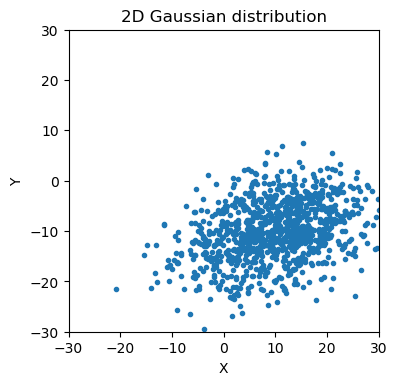

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['figure.dpi'] = 100

rng = default_rng()

import numpy as np
mean = [10.,-10.]

direction_1 = np.array([5,2])
direction_2 = np.array([-2,5])

cov = 3.*np.outer(direction_1,direction_1) + 1.*np.outer(direction_2,direction_2)

sample=rng.multivariate_normal(mean, cov, size=1000)

plt.plot(sample.T[0],sample.T[1],'.')

plt.xlabel('X')
plt.ylabel('Y')
plt.xlim([-30,30])
plt.ylim([-30,30])
plt.title('2D Gaussian distribution')
plt.savefig('gausssample.pdf')

print('mu: ',mean)
print('Sigma: ',cov)

The features of this blob are determined by the parameters ${\bf \mu}$ and ${\bf \Sigma}$. The numerical values are printed in the last cell. The covariance matrix has been constructed in a particular way that will be explained later, but let us take the value of its components at face value.  We find:
$$
\mu = \left( \begin{array}{r} 10 \\ -10 \end{array} \right)
$$
and
$$
\Sigma = \left( \begin{array}{rr} 79 & 20 \\ 20 &  37\end{array} \right)
$$

The blob has some structure. It is clearly not centred around the origin and also shows a correlation between
the variables $X$ and $Y$. We will now relate this to the parameters $\mu$ and $\Sigma$.

### Centering

We can subtract $\mu$ from our data points and show the effect:

(-30, 30)

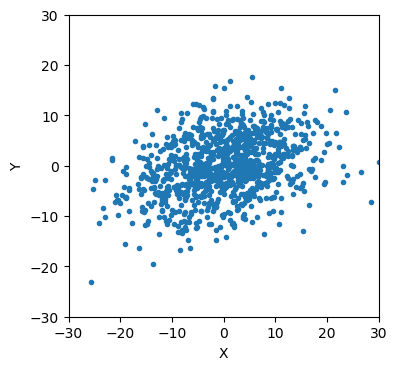

In [ ]:
centre_sample = sample - mean

plt.plot(centre_sample.T[0],centre_sample.T[1],'.')

plt.xlabel('X')
plt.ylabel('Y')
plt.xlim([-30,30])
plt.ylim([-30,30])

### Eigenvectors and eigenvalues of the covariance matrix

We will now find the eigenvectors and values of $\Sigma$.

In [ ]:
eigvalues, eigvecs = np.linalg.eig(cov)

print('First eigen vector', eigvecs[:,0])
print('Second eigen vector',eigvecs[:,1])

print('Eigenvalues: ', eigvalues)

First eigen vector [0.92847669 0.37139068]
Second eigen vector [-0.37139068  0.92847669]
Eigenvalues:  [87. 29.]


We can draw these directions in the data.

(-30.0, 30.0)

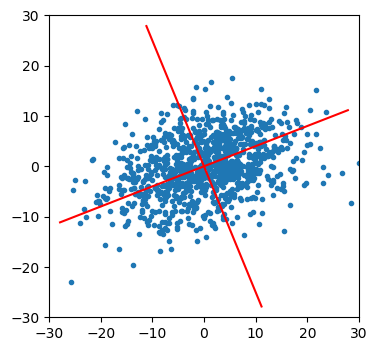

In [ ]:
plt.plot(centre_sample.T[0],centre_sample.T[1],'.')

limit = 30.
n_points = 100
dir1 = limit*np.linspace(-eigvecs[:,0][0], eigvecs[:,0][0],n_points)
dir2 = limit*np.linspace(-eigvecs[:,0][1], eigvecs[:,0][1],n_points)
plt.plot(dir1,dir2,'r-')

dir3 = limit*np.linspace(-eigvecs[:,1][0], eigvecs[:,1][0],n_points)
dir4 = limit*np.linspace(-eigvecs[:,1][1], eigvecs[:,1][1],n_points)
plt.plot(dir3,dir4,'r-')
plt.xlim([-limit,limit])
plt.ylim([-limit,limit])


(-30.0, 30.0)

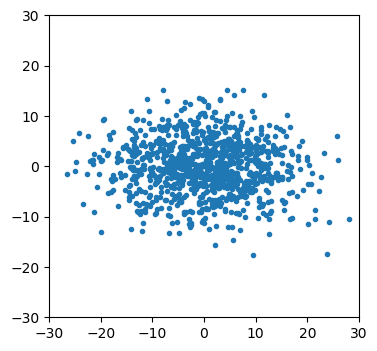

In [ ]:
u=eigvecs.T # we need to transpose because the matrix U has the eigenvectors as rows
rot_sample=u.dot(centre_sample.T)
plt.plot(rot_sample[0],rot_sample[1],'.')
plt.xlim([-limit,limit])
plt.ylim([-limit,limit])

This is the application of the formula
$$
{\bf y} = \boldsymbol{U}({\bf x} - \boldsymbol{\mu})
$$
to the data. The result is the product of two uncorrelated one-dimensional Gaussian distributions. We see that the matrix $\boldsymbol{U}$ indeed is formed by placing the eigenvectors of $\boldsymbol{\Sigma}$ in rows.

If we scale each direction by $\sqrt{\lambda_i}$, where $\lambda_i$ is the direction of eigenvalue $i$, we find:


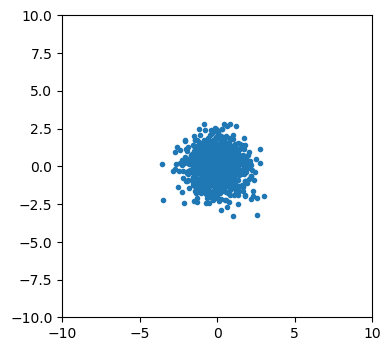

In [ ]:
norm_sample = rot_sample.T/np.sqrt(eigvalues)
plt.plot(norm_sample.T[0],norm_sample.T[1],'.')
limit = 10.
_=plt.xlim([-limit,limit])
_=plt.ylim([-limit,limit])

For comparison, let's sample a $\mathcal(N)(\boldsymbol{0}, \mathbb{1})$ distribution.

(bear in mind:
$\boldsymbol{0} = \left( \begin{array}{c} 0 \\ 0 \end{array} \right)$, $\mathbb{1} = \left( \begin{array}{cc} 1 & 0 \\ 0& 1 \end{array} \right)$. ) 

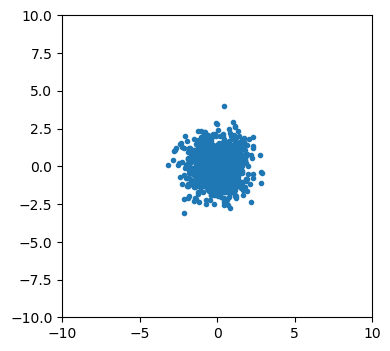

In [ ]:
mu = np.array([0.,0.])
cov = np.array([[1.,0.],[0.,1.]])
standard_sample=rng.multivariate_normal(mu, cov, size=1000)
plt.plot(standard_sample.T[0],standard_sample.T[1],'.')
_=plt.xlim([-limit,limit])
_=plt.ylim([-limit,limit])


### Conclusion

The last plot is a visual demonstration of a successful decorrelation of the data. It is now a circular blob. Since all differences of scale have been removed, these data are much more suitable to be fed into a machine learning pipeline. (Be aware that most decorrelated data will not look like a sphere, but will have more structure for example when the data is multimodal. The process of decorrelation still makes sense then).